# Data Grouping and Filtering

Another quite popular operations to perform on data are **grouping** and **filtering**.
The former is used to group values into mulitple subgroups and operate on specific groups; the latter is to dwelve into data based on specific categories or filters on values.
Most of the time, these two operations are performed together.

Pandas allows to do group and filtering, thanks to the `groupby` and `filter` functions. 

We will see examples in this notebook.

**Note** 

In this notebook, we will be using `numpy.random` functions for random selection of values and random number generations to work on fake data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[1:10]

['Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male']

In [5]:
income_data[1:10]

['Middle Class',
 'Middle Class',
 'Poor',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Rich',
 'Rich']

In [6]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [7]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [8]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,154.016956,38.314752,20.730042,19942.685113
1,Female,Middle Class,122.366677,50.723170,20.686376,19323.123788
2,Female,Middle Class,145.301950,60.241140,47.277365,20891.040955
3,Female,Poor,179.263676,27.125642,23.522400,18841.910556
4,Female,Poor,142.657334,100.794037,40.797750,20352.971685


## Data Grouping

In [9]:
grouped_gender = data.groupby("Gender")

In [10]:
grouped_gender.groups

{'Female': [1, 2, 3, 4, 5, 6, 7, 8, 11, 14, 16, 17, 23, 26, 28, 29, 30, 34, 35, 38, 39, 42, 43, 44, 45, 48, 49, 50, 55, 59, 60, 61, 62, 63, 64, 65, 68, 74, 77, 78, 79, 80, 82, 85, 86, 89, 91, 92, 93, 94, 95, 96, 98, 99, 104, 105, 106, 111, 112, 114, 115, 116, 117, 119, 122, 124, 126, 128, 129, 131, 136, 141, 143, 144, 145, 146, 147, 153, 156, 157, 159, 161, 164, 166, 167, 168, 171, 172, 173, 175, 176, 181, 182, 184, 187, 188, 189, 190, 191, 193, ...], 'Male': [0, 9, 10, 12, 13, 15, 18, 19, 20, 21, 22, 24, 25, 27, 31, 32, 33, 36, 37, 40, 41, 46, 47, 51, 52, 53, 54, 56, 57, 58, 66, 67, 69, 70, 71, 72, 73, 75, 76, 81, 83, 84, 87, 88, 90, 97, 100, 101, 102, 103, 107, 108, 109, 110, 113, 118, 120, 121, 123, 125, 127, 130, 132, 133, 134, 135, 137, 138, 139, 140, 142, 148, 149, 150, 151, 152, 154, 155, 158, 160, 162, 163, 165, 169, 170, 174, 177, 178, 179, 180, 183, 185, 186, 192, 194, 195, 197, 198, 199, 200, ...]}

In [11]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
1    Female    Middle Class  122.366677   50.723170  20.686376  19323.123788
2    Female    Middle Class  145.301950   60.241140  47.277365  20891.040955
3    Female            Poor  179.263676   27.125642  23.522400  18841.910556
4    Female            Poor  142.657334  100.794037  40.797750  20352.971685
5    Female    Middle Class  171.008789   74.898660  33.220096  20889.189311
..      ...             ...         ...         ...        ...           ...
490  Female    Middle Class  129.505533  127.830551  17.654461  19372.156338
493  Female            Rich  210.798331   26.693102   6.742729  19011.944336
494  Female            Rich  198.240073   62.630712  49.363900  18177.460562
495  Female            Poor  176.779939   71.335847   6.226424  18606.615671
497  Female            Rich  130.269386   85.821311  45.133012  19645.337869

[260 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [12]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Middle Class,122.366677,50.723170,20.686376,19323.123788
2,Female,Middle Class,145.301950,60.241140,47.277365,20891.040955
3,Female,Poor,179.263676,27.125642,23.522400,18841.910556
4,Female,Poor,142.657334,100.794037,40.797750,20352.971685
5,Female,Middle Class,171.008789,74.898660,33.220096,20889.189311
...,...,...,...,...,...,...
490,Female,Middle Class,129.505533,127.830551,17.654461,19372.156338
493,Female,Rich,210.798331,26.693102,6.742729,19011.944336
494,Female,Rich,198.240073,62.630712,49.363900,18177.460562
495,Female,Poor,176.779939,71.335847,6.226424,18606.615671


In [13]:
double_group = data.groupby(["Gender", "Economic Status"])

In [14]:
len(double_group)

6

In [15]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
1    Female    Middle Class  122.366677   50.723170  20.686376  19323.123788
2    Female    Middle Class  145.301950   60.241140  47.277365  20891.040955
5    Female    Middle Class  171.008789   74.898660  33.220096  20889.189311
6    Female    Middle Class  115.644839   72.646123  25.776260  19154.283817
11   Female    Middle Class  156.617726   43.571260  33.415839  19812.339577
..      ...             ...         ...         ...        ...           ...
483  Female    Middle Class  125.836892   64.390619  23.637169  19774.958241
484  Female    Middle Class  163.812843   78.585019  27.075204  21427.155984
486  Female    Middle Class  140.216340   93.420032  32.204008  20042.046901
489  Female    Middle Class  172.016831   83.725620  25.453840  19234.918911
490  Female    Middle Class  129.505533  127.830551  17.654461  19372.156338

[82 rows x 6 columns]
('Female', 'Poor')
     Ge

## Operations on Groups

In [16]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     12495.250399  5419.667247  2365.970943  1.618548e+06
       Poor             13048.545183  5538.390709  2369.594945  1.624118e+06
       Rich             14938.785896  6017.575620  2801.240252  1.877361e+06
Male   Middle Class     11035.751284  4659.575154  2102.690301  1.368645e+06
       Poor             14666.819560  6403.857605  2879.212720  1.810191e+06
       Rich             12579.796986  5316.093146  2310.349201  1.554214e+06

In [17]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     152.381102  66.093503  28.853304  19738.389277
       Poor             157.211388  66.727599  28.549337  19567.692010
       Rich             157.250378  63.342901  29.486739  19761.698784
Male   Middle Class     157.653590  66.565359  30.038433  19552.068464
       Poor             161.173841  70.372062  31.639700  19892.209459
       Rich             159.237937  67.292318  29.244927  19673.599851

In [18]:
double_group.size()

Gender  Economic Status
Female  Middle Class       82
        Poor               83
        Rich               95
Male    Middle Class       70
        Poor               91
        Rich               79
dtype: int64

In [19]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      82.0  152.381102  25.949161  91.804309  135.942627   
       Poor              83.0  157.211388  29.916465  75.568294  136.739579   
       Rich              95.0  157.250378  28.230792  75.921225  139.262729   
Male   Middle Class      70.0  157.653590  26.830808  99.154999  140.243623   
       Poor              91.0  161.173841  34.207144  67.051574  136.972097   
       Rich              79.0  159.237937  29.144256  92.654235  136.767368   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     151.821686  171.032859  222.648119   82.0  66.093503   
       Poor             157.162764  179.180998  225.432667   83.0  66.727599   
       Rich             156.540648  175.176423  218.522656   95.0  63.342901   
Male   Middle Class     154.128806  174.404689  219.793640   70.0  66.565359   
       Poor             162.963224  182.218808  263.333902   91.0  70.372062   
       Rich             160.618424  178.327680  219.927143   79.0  67.292318   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  37.788748  56.187263   82.0  19738.389277   
       Poor             ...  37.302971  61.845545   83.0  19567.692010   
       Rich             ...  37.248653  74.311003   95.0  19761.698784   
Male   Middle Class     ...  38.259889  58.355039   70.0  19552.068464   
       Poor             ...  38.033146  66.080066   91.0  19892.209459   
       Rich             ...  38.463008  59.182323   79.0  19673.599851   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class      986.965632  18007.637668  19044.670967  19699.590565   
       Poor              998.844171  18015.433373  18737.075855  19452.720351   
       Rich             1049.958529  18005.984736  18848.550712  19690.242787   
Male   Middle Class      952.044217  18027.003941  18816.055465  19419.053865   
       Poor              921.978266  18162.491655  19110.719802  19935.561406   
       Rich              963.650608  18026.459367  18937.582698  19542.951252   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20639.271164  21443.546167  
       Poor             20363.535560  21432.126649  
       Rich             20681.979066  21483.981934  
Male   Middle Class     20326.576708  21453.585443  
       Poor             20609.988692  21463.995555  
       Rich             20531.750323  21359.475229  

[6 rows x 32 columns]

In [20]:
grouped_income = double_group["Income"]

In [21]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      82.0  19738.389277   986.965632  18007.637668   
       Poor              83.0  19567.692010   998.844171  18015.433373   
       Rich              95.0  19761.698784  1049.958529  18005.984736   
Male   Middle Class      70.0  19552.068464   952.044217  18027.003941   
       Poor              91.0  19892.209459   921.978266  18162.491655   
       Rich              79.0  19673.599851   963.650608  18026.459367   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     19044.670967  19699.590565  20639.271164  21443.546167  
       Poor             18737.075855  19452.720351  20363.535560  21432.126649  
       Rich             18848.550712  19690.242787  20681.979066  21483.981934  
Male   Middle Class     18816.055465  19419.053865  20326.576708  21453.585443  
       Poor             19110.719802  19935.561406  20609.988692  21463.995555  
       Rich             18937.582698  19542.951252  20531.750323  21359.475229

In [22]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.618548e+06  28.853304  25.949161
       Poor             1.624118e+06  28.549337  29.916465
       Rich             1.877361e+06  29.486739  28.230792
Male   Middle Class     1.368645e+06  30.038433  26.830808
       Poor             1.810191e+06  31.639700  34.207144
       Rich             1.554214e+06  29.244927  29.144256

In [23]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     28.853304  5.908432
       Poor             28.549337  5.286958
       Rich             29.486739  5.599723
Male   Middle Class     30.038433  5.918268
       Poor             31.639700  4.737805
       Rich             29.244927  5.498697

In [24]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     12495.250399  152.381102  25.949161  5419.667247   
       Poor             13048.545183  157.211388  29.916465  5538.390709   
       Rich             14938.785896  157.250378  28.230792  6017.575620   
Male   Middle Class     11035.751284  157.653590  26.830808  4659.575154   
       Poor             14666.819560  161.173841  34.207144  6403.857605   
       Rich             12579.796986  159.237937  29.144256  5316.093146   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     66.093503  29.299453  2365.970943  28.853304   
       Poor             66.727599  25.525678  2369.594945  28.549337   
       Rich             63.342901  26.243615  2801.240252  29.486739   
Male   Middle Class     66.565359  24.972004  2102.690301  30.038433   
       Poor             70.372062  25.967907  2879.212720  31.639700   
       Rich             67.292318  24.701098  2310.349201  29.244927   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     11.838611  1.618548e+06  19738.389277   986.965632  
       Poor             12.613169  1.624118e+06  19567.692010   998.844171  
       Rich             13.734222  1.877361e+06  19761.698784  1049.958529  
Male   Middle Class     12.861970  1.368645e+06  19552.068464   952.044217  
       Poor             12.313177  1.810191e+06  19892.209459   921.978266  
       Rich             12.728096  1.554214e+06  19673.599851   963.650608

In [25]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.908432  2.269675  2.452219  20.122137
       Poor             5.286958  2.630028  2.277214  19.709426
       Rich             5.599723  2.426455  2.158343  18.921258
Male   Middle Class     5.918268  2.684846  2.352308  20.685216
       Poor             4.737805  2.724977  2.583817  21.695106
       Rich             5.498697  2.741672  2.312349  20.546151

## Data Filtering

In [26]:
double_group["Age"].filter(lambda x: x.sum()>2400)

8      10.900306
12     28.940598
13     32.058644
16     30.106189
18     52.939921
         ...    
488    26.846444
492    25.695641
493     6.742729
494    49.363900
497    45.133012
Name: Age, Length: 186, dtype: float64

## Transforming variables

In [27]:
zscore = lambda x : (x - x.mean())/x.std()

In [28]:
z_group = double_group.transform(zscore)

In [29]:
import matplotlib.pyplot as plt

(array([  6.,  11.,  48.,  73., 143., 102.,  73.,  33.,   8.,   3.]),
 array([-3.03329778, -2.40359886, -1.77389994, -1.14420101, -0.51450209,
         0.11519684,  0.74489576,  1.37459469,  2.00429361,  2.63399253,
         3.26369146]),
 <BarContainer object of 10 artists>)

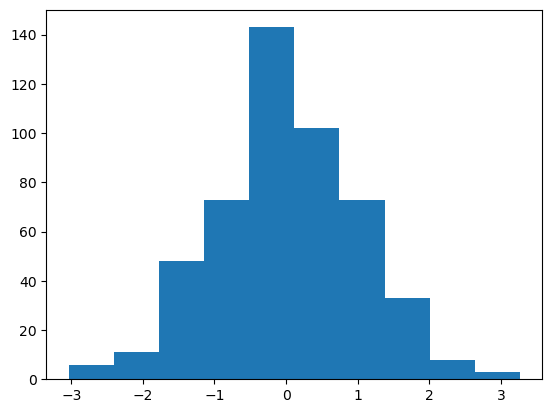

In [30]:
plt.hist(z_group["Age"])

In [31]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [32]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,154.016956,38.314752,20.730042,19942.685113
1,122.366677,50.723170,20.686376,19323.123788
2,145.301950,60.241140,47.277365,20891.040955
3,179.263676,27.125642,23.522400,18841.910556
4,142.657334,100.794037,40.797750,20352.971685
...,...,...,...,...
495,176.779939,71.335847,6.226424,18606.615671
496,151.831584,88.355116,24.901216,18369.987327
497,130.269386,85.821311,45.133012,19645.337869
498,158.408690,25.212917,34.775791,18098.733141


## Other operations on data and groups

In [33]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,154.016956,38.314752,20.730042,19942.685113
1,Female,Middle Class,122.366677,50.723170,20.686376,19323.123788
3,Female,Poor,179.263676,27.125642,23.522400,18841.910556
8,Female,Rich,145.743886,53.823403,10.900306,21483.981934
9,Male,Rich,152.324443,58.493022,36.177047,18874.474113
12,Male,Poor,144.545845,57.423869,28.940598,19452.017414


In [34]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
490,Female,Middle Class,129.505533,127.830551,17.654461,19372.156338
492,Male,Poor,134.060443,56.033085,25.695641,19220.812499
495,Female,Poor,176.779939,71.335847,6.226424,18606.615671
497,Female,Rich,130.269386,85.821311,45.133012,19645.337869
498,Male,Rich,158.408690,25.212917,34.775791,18098.733141
499,Male,Middle Class,115.869144,28.217767,28.816851,19642.503198


In [35]:
double_group.nth(32)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     148.191477  111.618583  13.353457  20899.240970
       Poor             124.387775  109.105713  11.040304  21330.639425
       Rich             163.073990  118.916313  24.250781  18500.647330
Male   Middle Class     125.312275   89.096922  20.082844  20606.999308
       Poor             200.227551   54.700736  43.320305  21434.551100
       Rich             153.929625  104.760131   3.126504  20479.292793

In [36]:
double_group.nth(82)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Poor             176.779939  71.335847   6.226424  18606.615671
       Rich             150.390314  35.297101  28.996311  19357.858088
Male   Poor             130.484407  57.978150  41.428731  20229.744115

In [37]:
data_sorted = data.sort_values(["Age", "Income"])

In [38]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
332,Female,Poor,134.536567,52.449363,-8.921459,19941.245264
51,Male,Middle Class,173.966337,52.125790,-7.960140,20002.184933
294,Male,Poor,224.429625,58.762064,-5.709832,18878.630933
105,Female,Rich,157.540576,97.223013,-4.766870,19451.623423
301,Female,Middle Class,120.794961,126.349268,-2.086711,20447.760310
464,Male,Poor,141.162396,56.070370,-0.434128,18919.385336
106,Female,Rich,133.901315,31.416364,0.967270,18231.308349
237,Male,Rich,155.965992,91.581214,1.918911,19369.580058
202,Male,Rich,153.929625,104.760131,3.126504,20479.292793
304,Male,Middle Class,175.068413,51.555548,3.297093,19282.391161


In [39]:
age_grouped = data_sorted.groupby("Gender")

In [40]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
332,Female,Poor,134.536567,52.449363,-8.921459,19941.245264
51,Male,Middle Class,173.966337,52.125790,-7.960140,20002.184933


In [41]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
84,Male,Poor,155.505040,83.590031,66.080066,18507.279070
136,Female,Rich,165.317564,66.390394,74.311003,20831.793418
